In [1]:
from propflow.snapshots import(
    SnapshotAnalyzer,
    SnapshotManager,
    SnapshotRecord,
   
)
from propflow import FGBuilder
from propflow.engines import Engine
from propflow.core import FactorAgent,VariableAgent
import numpy as np

/var/folders/_9/m77fv7yj7v17s1l0d7wr4n3m0000gn/T/ipykernel_96133/49023851.py:30: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


[FactorAgent(f12, connections=['x1', 'x2']),
 FactorAgent(f23, connections=['x2', 'x3']),
 FactorAgent(f31, connections=['x3', 'x1'])]

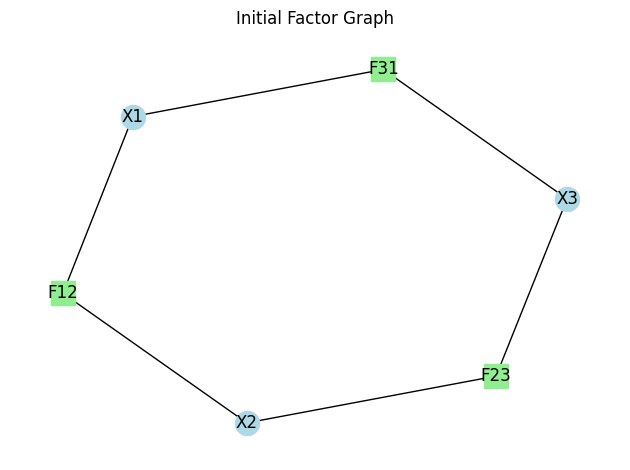

In [2]:

from typing import Dict,List
from propflow.core.protocols import CostTable


x1 = VariableAgent("x1",2)
x2 = VariableAgent("x2",2)
x3 = VariableAgent("x3",2)
C12 : CostTable=np.array([[4,1],[3,2]])
C23 :CostTable=np.array([[0,2],[2,0]])
C31 :CostTable= np.array([[0,3],[3,0]])
f12 = FactorAgent.create_from_cost_table("f12",C12)
f23 = FactorAgent.create_from_cost_table("f23",C23)
f31 = FactorAgent.create_from_cost_table("f31",C31)
edges : Dict[FactorAgent,List[VariableAgent]] = {
    f12:[x1,x2],
    f23:[x2,x3],
    f31:[x3,x1]
}
fg = FGBuilder().build_from_edges(
    [x1,x2,x3],
    [f12,f23,f31],
    edges=edges
)
f12.connection_number
fig = fg.visualize("spring",plot=False)
axes = fig.get_axes()[0]
axes.set_title("Initial Factor Graph")

fig.tight_layout()
fig.show()
fg.get_factor_agents()


In [3]:
from propflow.bp.computators import MinSumComputator
from propflow.snapshots.types import SnapshotsConfig
config = SnapshotsConfig(True,True,True,True,True)
engine = Engine(fg, MinSumComputator(), snapshots_config= config,use_bct_history=True)
engine.run(max_iter=20)

/Users/or/Projects/Belief-Propagation-Simulator/src/propflow/snapshots/visualizer.py:574: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  per_var_fig.show()
/Users/or/Projects/Belief-Propagation-Simulator/src/propflow/snapshots/visualizer.py:498: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


SnapshotData(step=19, lambda_=0.0, dom={'x1': ['0', '1'], 'x3': ['0', '1'], 'x2': ['0', '1']}, N_var={'x1': ['f12', 'f31'], 'x3': ['f23', 'f31'], 'x2': ['f12', 'f23']}, N_fac={'f12': ['x1', 'x2'], 'f31': ['x3', 'x1'], 'f23': ['x2', 'x3']}, Q={('x1', 'f12'): array([1., 0.]), ('x1', 'f31'): array([0., 1.]), ('x3', 'f31'): array([1., 0.]), ('x3', 'f23'): array([0., 1.]), ('x2', 'f12'): array([0., 1.]), ('x2', 'f23'): array([1., 0.])}, R={('f12', 'x1'): array([2., 3.]), ('f12', 'x2'): array([3., 2.]), ('f31', 'x1'): array([1., 0.]), ('f31', 'x3'): array([0., 1.]), ('f23', 'x3'): array([1., 0.]), ('f23', 'x2'): array([0., 1.])}, cost={'f12': <function build_snapshot_from_engine.<locals>.make_cost_fn.<locals>._cost at 0x116d06ca0>, 'f31': <function build_snapshot_from_engine.<locals>.make_cost_fn.<locals>._cost at 0x116d05800>, 'f23': <function build_snapshot_from_engine.<locals>.make_cost_fn.<locals>._cost at 0x116d077e0>}, cost_tables={'f12': array([[4., 1.],
       [3., 2.]]), 'f31': arra

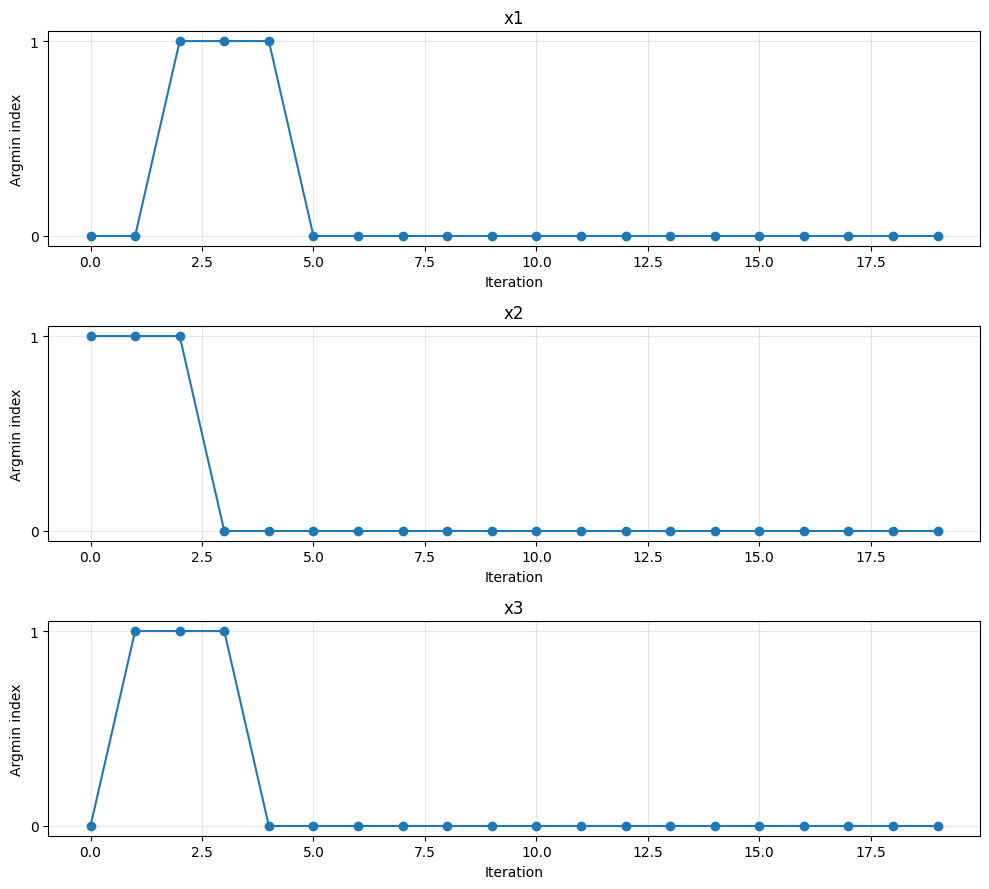

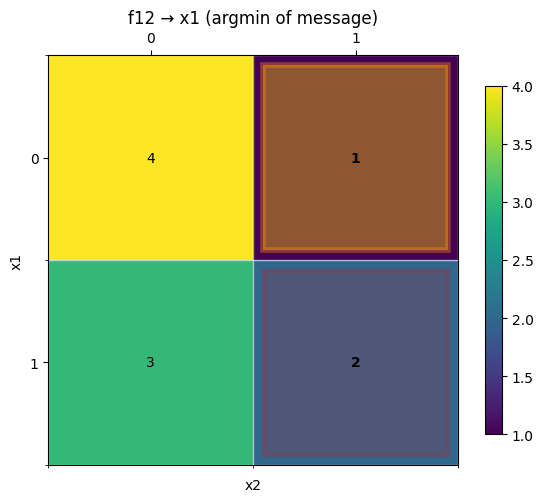

In [4]:
from propflow.snapshots.visualizer import SnapshotVisualizer
visualizer = SnapshotVisualizer(engine.snapshots)
visualizer.plot_argmin_per_variable(vars_filter=["x1","x2","x3"])
visualizer.plot_factor_costs('x1', 'f12', step=0)
engine.snapshots[-1].data

In [5]:
from propflow.snapshots import(
    SnapshotAnalyzer,
    SnapshotManager,
    SnapshotRecord,
   
)
from propflow import FGBuilder
from propflow.engines import Engine
from propflow.core import FactorAgent,VariableAgent
import numpy as np